In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


In [2]:
class Perceptron(object):
    """ パーセプトロンの分類器
    パラメータ
    -----------
    eta : float
        学習率
    n_itr : int
        訓練データの訓練回数
    random_stete : int
        重みを初期化するためのランダムシード

    属性
    -----------
    w_ : 1次元配列
    erros : リスト
        各エポックでの誤分類（更新）の数
    
    """

    def __init__(self, eta=0.01, n_itr=50, random_state=1):
        self.eta = eta
        self.n_itr = n_itr
        self.random_state = random_state

    def fit(self, X, y):
        """ 訓練データの学習
        パラメータ
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            訓練データ
        y : array-like, shape = [n_samples]
            正解ラベル

        戻り値
        -----------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_itr): # 訓練回数分まで訓練データを反復
            errors = 0
            for xi, target in zip(X, y): #各訓練データで重みを更新
                update = self.eta * (target - self.predict(xi)) # 重みの更新。元のやつとの差で学習率とかける
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
        
    def predict(self, X):
        """1ステップ後のクラスラベルを消す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
np.where?

Call signature:  np.where(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <built-in function where>
Docstring:      
where(condition, [x, y], /)

Return elements chosen from `x` or `y` depending on `condition`.

.. note::
    When only `condition` is provided, this function is a shorthand for
    ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
    preferred, as it behaves correctly for subclasses. The rest of this
    documentation covers only the case where all three arguments are
    provided.

Parameters
----------
condition : array_like, bool
    Where True, yield `x`, otherwise yield `y`.
x, y : array_like
    Values from which to choose. `x`, `y` and `condition` need to be
    broadcastable to some shape.

Returns
-------
out : ndarray
    An array with elements from `x` where `condition` is True, and elements
    from `y` elsewhere.

See Also
--------
choose
nonzero : The function that is called when x and y are omitted

Notes


Weights: [ 0.41624345  0.19388244 -0.60528172]
Errors: [3, 3, 2, 2, 4, 3, 2, 4, 4, 3]


/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_28764/1085219342.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


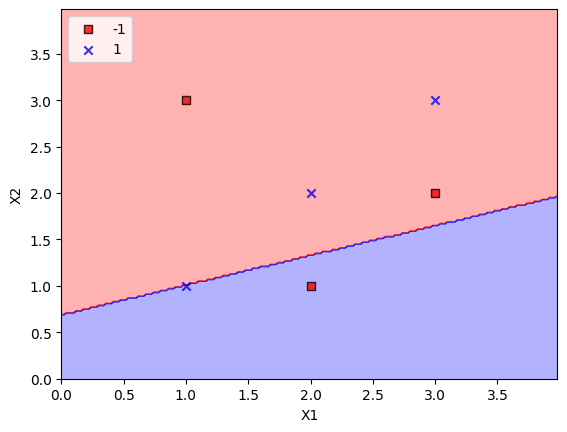

In [4]:
# ChatGPT
# 訓練データの生成
X = np.array([[1, 1], [2, 2], [3, 3], [1, 3], [2, 1], [3, 2]])
y = np.array([1, 1, 1, -1, -1, -1])

# パーセプトロンのインスタンス化と訓練
ppn = Perceptron(eta=0.1, n_itr=10)
ppn.fit(X, y)

# 重みの表示
print('Weights:', ppn.w_)
print('Errors:', ppn.errors_)

# 決定領域のプロット関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()

In [5]:
# ChatGPT
class Perceptron:
    def __init__(self, eta=0.01, n_itr=50, random_state=1):
        self.eta = eta
        self.n_itr = n_itr
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_itr):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# データ
X = np.array([[1.1, 2.3], [2.4, 3.5], [1.3, 0.8], [3.0, 3.7], [2.1, 1.8], [3.2, 3.1]])
y = np.array([1, 1, -1, 1, -1, 1])

# パーセプトロンの学習
ppn = Perceptron(eta=0.1, n_itr=10)
ppn.fit(X, y)

# 重みの表示
print('Weights:', ppn.w_)

# 新しいデータの予測
new_data = [1.5, 2.0]
print('Prediction for', new_data, ':', ppn.predict(new_data))

Weights: [-1.58375655 -0.30611756  1.15471828]
Prediction for [1.5, 2.0] : 1


In [6]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


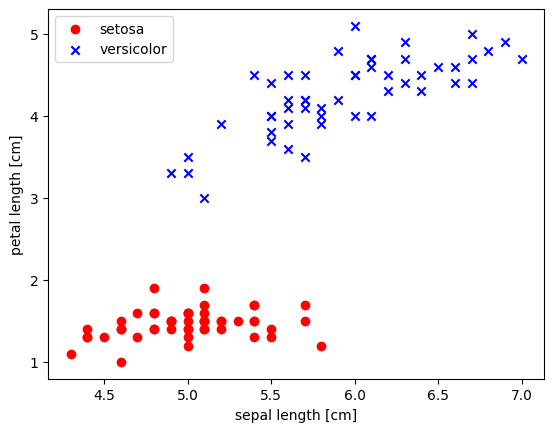

In [7]:
# 1-100行の目的変数抽出
y = df.iloc[0:100, 4].values
# Iris-setosaを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)
# 1,3列目を抽出
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

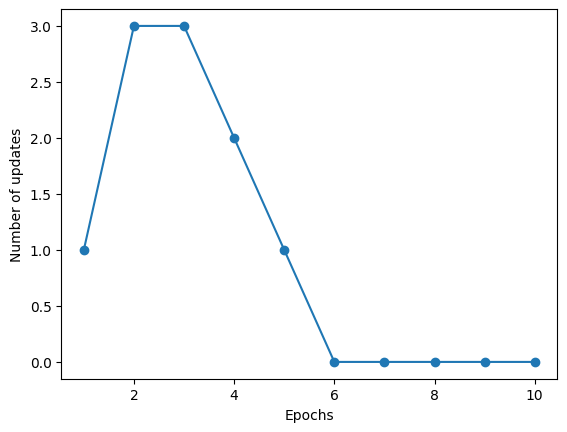

In [8]:
# パーセプトロンのオブジェクト生成
ppn = Perceptron(eta=0.1, n_itr=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [9]:


def plot_decision_regions(X, y, classifier,resolution=0.02):

    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの作成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #　各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print("predict Z: ", Z)
    # 予測結果を元のデータサイズに変換
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

predict Z:  [-1 -1 -1 ...  1  1  1]


/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_28764/116974222.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


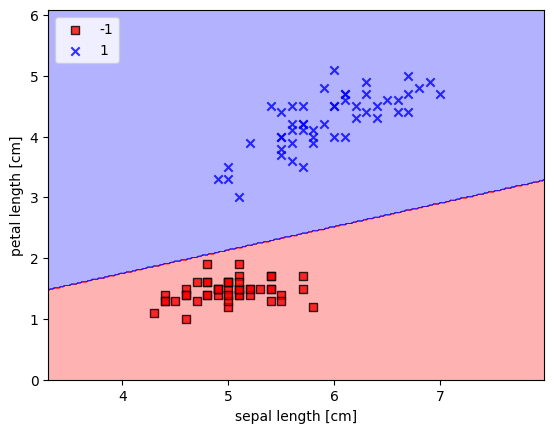

In [10]:
# 決定領域のプロット
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [11]:
class AdalineGD(object):
    """ ADALINEの分類器
    パラメータ
    -----------
    eta : float
        学習率
    n_itr : int
        訓練データの訓練回数
    random_state : int
        重みを初期化するためのランダムシード

    属性
    -----------
    w_ : 1次元配列
        適合後の重み
    cost_ : リスト
        各エポックでのコスト関数の値
    """
    def __init__(self, eta=0.01, n_itr=50, random_state=1):
        self.eta = eta
        self.n_itr = n_itr
        self.random_state = random_state

    def fit(self, X, y):
        """ 訓練データの学習
        パラメータ
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            訓練データ
        y : array-like, shape = [n_samples]
            正解ラベル

        戻り値
        -----------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []  # コストリストの初期化

        for _ in range(self.n_itr):  # 訓練回数分まで訓練データを反復
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)  # コストの収納
        return self

    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """線形活性化関数の出力"""
        return X

    def predict(self, X):
        """クラスラベルを予測する"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


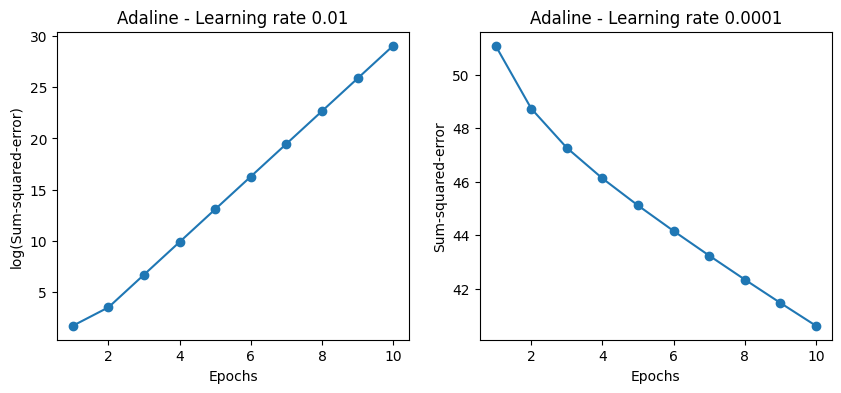

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# 勾配法によるADALINEの学習
ada1 = AdalineGD(n_itr=10, eta=0.01).fit(X, y)
# 折れ線グラフプロット
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

# 学習率変更ADA
ada2 = AdalineGD(n_itr=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()


In [13]:
# 標準化
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

predict Z:  [-1 -1 -1 ...  1  1  1]


/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_28764/116974222.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


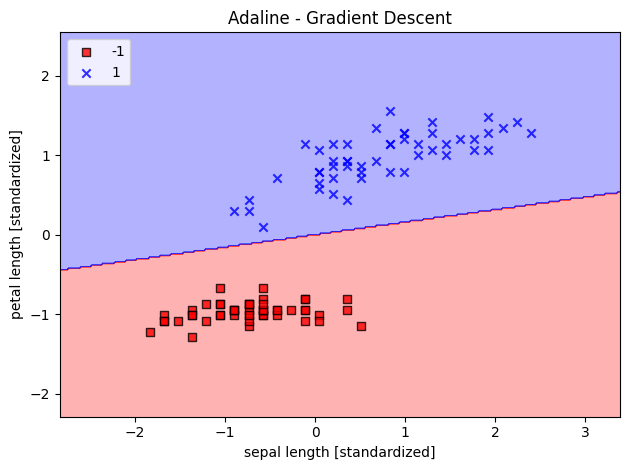

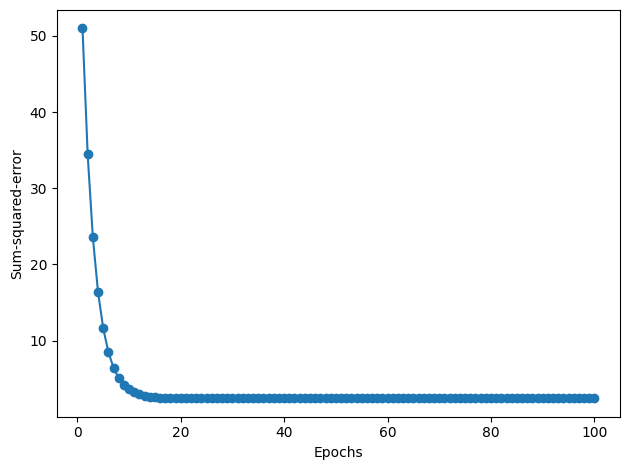

In [15]:
ada_gd = AdalineGD(n_itr=100, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

In [21]:
import numpy as np

class AdalineSGD(object):
    """ADALINE分類器（確率的勾配降下法）
    
    パラメータ
    -----------
    eta : float
        学習率
    n_iter : int
        訓練データの訓練回数
    shuffle : bool (default: True)
        各エポックで訓練データをシャッフルして、重複を防ぐ
    random_state : int (default: None)
        シャッフルに使用するランダムステートのシード値
    
    属性
    ----------
    w_ : 1次元配列
        適合後の重み
    cost_ : リスト
        各エポックでのコスト関数の値
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_initialized = False

        if random_state:
            np.random.seed(random_state)

    def fit(self, X, y):
        """訓練データに適合させる"""
        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """初期化なしで訓練データに適合させる"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _initialize_weights(self, m):
        """重みを小さな乱数に初期化する"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _shuffle(self, X, y):
        """訓練データをシャッフルする"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _update_weights(self, xi, target):
        """ADALINEの学習規則を適用して重みを更新"""
        net_input = self.net_input(xi)
        output = self.activation(net_input)
        error = target - output
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """線形活性化関数の出力"""
        return X

    def predict(self, X):
        """クラスラベルを予測する"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

predict Z:  [-1 -1 -1 ...  1  1  1]


/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_28764/116974222.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


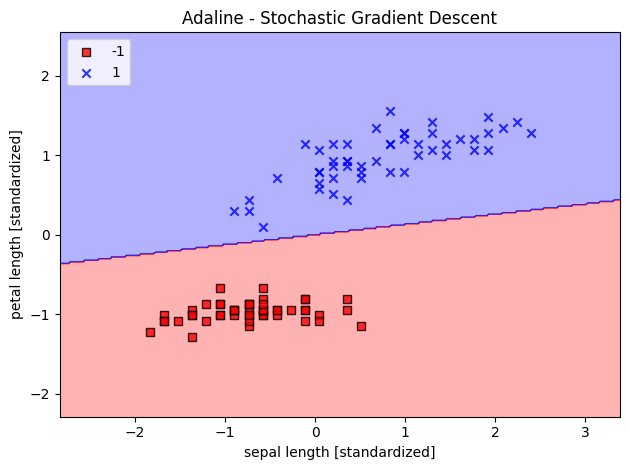

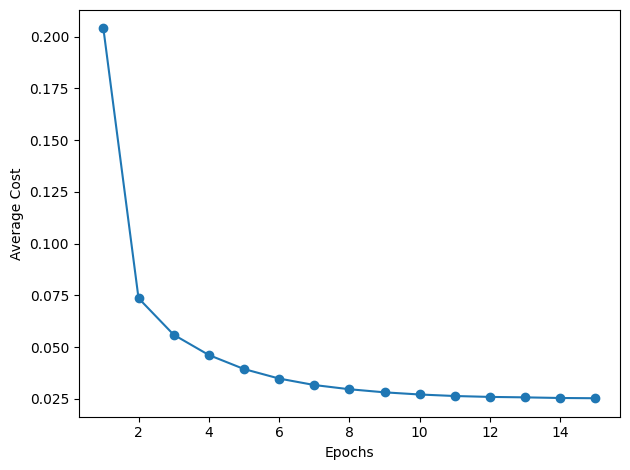

In [22]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()